In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('survey_results_public.csv')
data_columns = data.columns
countrys = data.drop_duplicates(subset='Country')['Country']
country_count = countrys.count()

developer_list = []
for country in list(countrys)[1:]:
    developer_list.append(data[data['Country'] == country]['Country'].count())

index = np.arange(len(list(countrys)[1:]))
countrys_df = pd.DataFrame({'Country':list(countrys)[1:]}, index=index)
developer_df = pd.DataFrame({'Count':developer_list}, index=index)
developer = pd.concat([countrys_df, developer_df], axis=1)
df = developer.sort_values(by=['Count'], ascending=False).head(10)
df.index = np.arange(10)
df['Country'][3] = 'U.K'
df['Country'][0] = 'U.S.A'
df

C:\Users\g8808\AppData\Local\Temp\ipykernel_3780\2413216234.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'][0] = 'U.S.A'


,Country,Count
0,U.S.A,13543
1,India,6639
2,Germany,5395
3,U.K,4190
4,Canada,2490
5,France,2328
6,Brazil,2109
7,Poland,1732
8,Netherlands,1555
9,Spain,1521


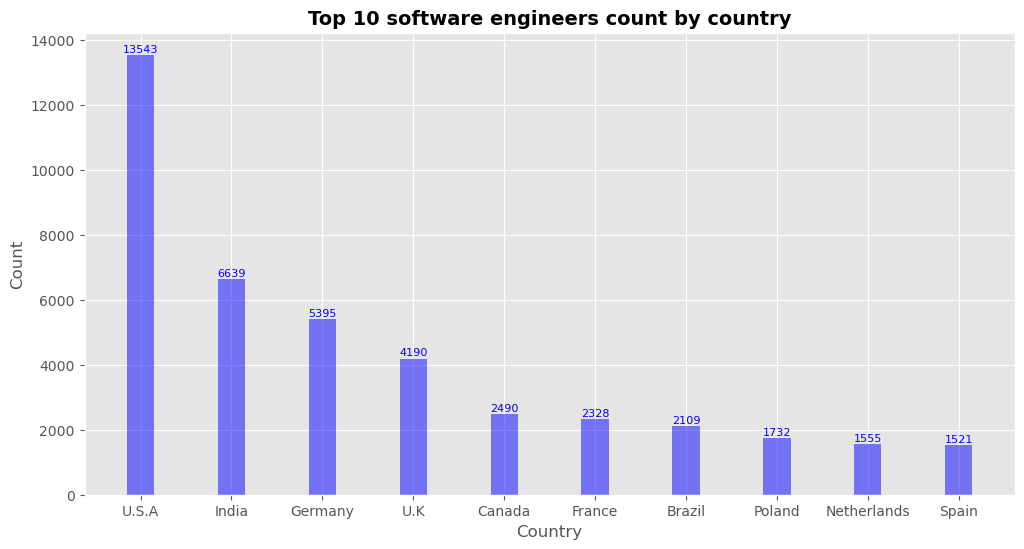

In [22]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,6))
plt.style.use('ggplot')
barWidth = 0.3
index = np.arange(10)
b1 = plt.bar(index, df['Count'], barWidth, alpha=0.5, color='blue')
for idx, val in df['Count'].items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points', fontsize=8, ha='center', color='blue')
plt.xticks(index, df['Country'])
plt.title('Top 10 software engineers count by country', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()